In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier 



In [2]:
df = pd.read_csv('Data_Cortex_Nuclear .csv')

In [3]:
df.dtypes

MouseID             object
DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAF_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
                    ...   
RRP1_N             float64
BAX_N              float64
ARC_N              float64
ERBB4_N            float64
nNOS_N             float64
Tau_N              float64
G

In [4]:
df.isnull().sum()

MouseID              0
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
                  ... 
RRP1_N               0
BAX_N                0
ARC_N                0
ERBB4_N              0
nNOS_N               0
Tau_N                0
GFAP_N               0
GluR3_N              0
GluR4_N              0
IL1B_N               0
P3525_N              0
pCASP9_N             0
PSD95_N    

In [5]:
#Impute missing protein expression values with a random value chosen from a normal distribution centered on the protein's mean
#expression value

for c in range(1, (len(df.columns.values))-4):
    df.iloc[:, c].fillna(np.random.normal(np.mean(df.iloc[:, c]), np.std(df.iloc[:, c])), inplace = True)
    


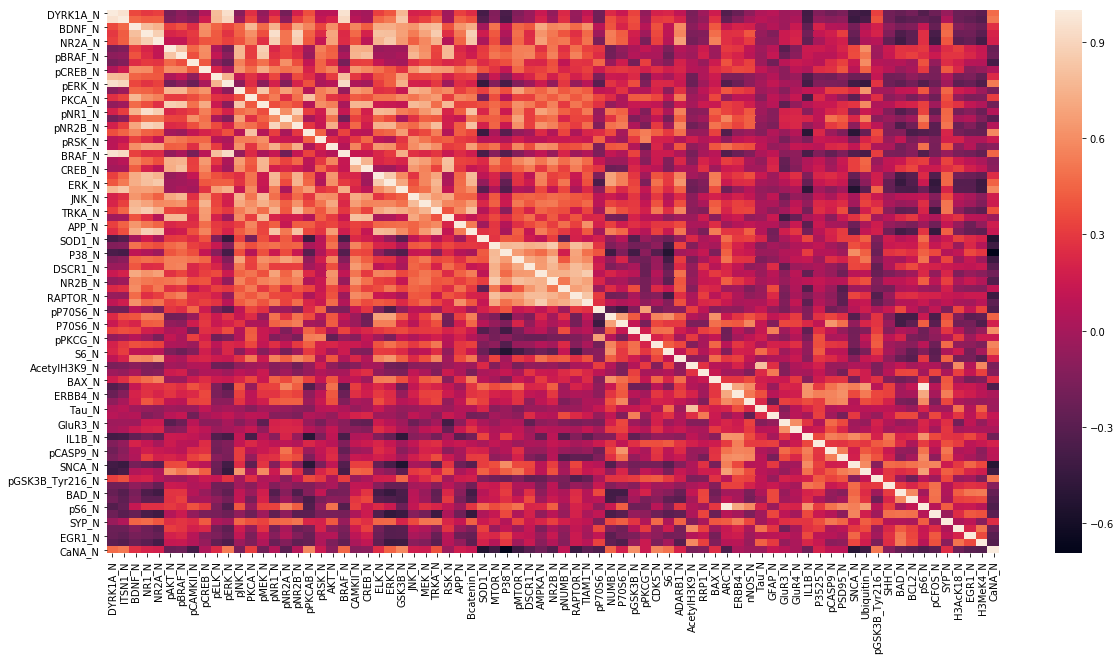

In [6]:
#How much collinearity exists among features?

correl = df.iloc[:, 1:-4].corr()

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correl, ax = ax)
plt.show()

In [7]:
#Make a test set and initial training set with protein expression values as features and genotype as binary outcome

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-4], 
                                                    df.iloc[:, -4], test_size=0.2, random_state=42)

In [8]:
#Construct a random forest classifier to predict genotype using protein expression values only

rf1 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0).fit(X_train, y_train)

rf1.score(X_train, y_train)

0.9398148148148148

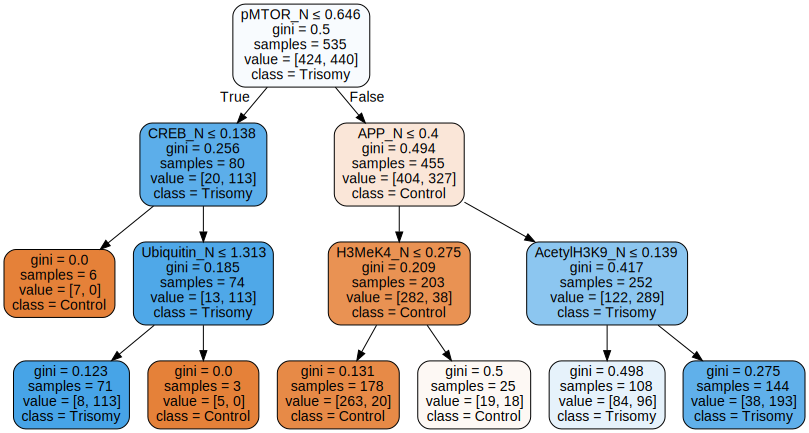

In [9]:
from sklearn import tree
import graphviz


#Look at a random tree in the random forest
tree1 = rf1.estimators_[1]

dot_data = tree.export_graphviz(tree1, out_file=None, feature_names=df.iloc[:, 1:-4].columns.values, 
                                class_names=['Control','Trisomy'],filled=True, rounded=True, special_characters=True)  
graph1 = graphviz.Source(dot_data)  
graph1 



In [10]:
#Get a list of features and their importance values

feature_importances = [(feature, round(importance, 2)) for 
                       feature, importance in zip(df.iloc[:, 1:-4].columns.values, list(rf1.feature_importances_))]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

#show only those features with importance > 0.0
for x in feature_importances:
    if x[1] > 0:
        print(x)

('APP_N', 0.13)
('ITSN1_N', 0.08)
('S6_N', 0.06)
('AcetylH3K9_N', 0.06)
('Tau_N', 0.05)
('P38_N', 0.03)
('pMTOR_N', 0.03)
('AMPKA_N', 0.03)
('pPKCG_N', 0.03)
('DYRK1A_N', 0.02)
('pNR1_N', 0.02)
('MTOR_N', 0.02)
('NR2B_N', 0.02)
('RAPTOR_N', 0.02)
('TIAM1_N', 0.02)
('pP70S6_N', 0.02)
('SYP_N', 0.02)
('H3MeK4_N', 0.02)
('BDNF_N', 0.01)
('NR2A_N', 0.01)
('pCAMKII_N', 0.01)
('pCREB_N', 0.01)
('pELK_N', 0.01)
('pERK_N', 0.01)
('PKCA_N', 0.01)
('pNR2A_N', 0.01)
('pNR2B_N', 0.01)
('pRSK_N', 0.01)
('BRAF_N', 0.01)
('ERK_N', 0.01)
('SOD1_N', 0.01)
('DSCR1_N', 0.01)
('pNUMB_N', 0.01)
('pGSK3B_N', 0.01)
('ADARB1_N', 0.01)
('RRP1_N', 0.01)
('ARC_N', 0.01)
('ERBB4_N', 0.01)
('GFAP_N', 0.01)
('GluR3_N', 0.01)
('IL1B_N', 0.01)
('PSD95_N', 0.01)
('Ubiquitin_N', 0.01)
('pS6_N', 0.01)
('H3AcK18_N', 0.01)


In [24]:
#Because there is considerable collinearity among some of the gene expression features, I'll try a ridge classifier to 
#ensure the explained variance is not inflated by multicollinearity.

rc1 = RidgeClassifier()
rc1.fit(X_train, y_train)
rc1.score(X_train, y_train)

0.9722222222222222

In [54]:
predict = rc1.predict(X_test)
correct = []
for i in range(len(y_test)):
    if predict[i] == y_test.iloc[i]:
        correct.append(i)
print(len(correct))
print(len(y_test))

209
216


In [52]:
predict[1] == y_test.iloc[1]

True